<a href="https://colab.research.google.com/github/Ayushraj6942/GDG-Project/blob/main/gdg_last_ass_prob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance matplotlib numpy pandas


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Fetch BTC-USD Data (2 Years)

In [ ]:
# Fetch BTC-USD data for 2 years
start_date = "2023-03-01"
end_date = "2025-03-05"
btc_data = yf.download("BTC-USD", start=start_date, end=end_date)

# Display first few rows
print(btc_data.head())


[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2023-03-01  23646.550781  23880.632812  23088.626953  23150.929688   
2023-03-02  23475.466797  23739.138672  23245.021484  23647.019531   
2023-03-03  22362.679688  23479.347656  22213.238281  23476.632812   
2023-03-04  22353.349609  22405.177734  22198.980469  22362.923828   
2023-03-05  22435.513672  22613.685547  22307.142578  22354.144531   

Price            Volume  
Ticker          BTC-USD  
Date                     
2023-03-01  24662841200  
2023-03-02  20386398516  
2023-03-03  26062404610  
2023-03-04  11166012913  
2023-03-05  13317001733  


Compute Stock Span Using Stack (O(n) Approach)

In [ ]:
def calculate_stock_span(prices):
    n = len(prices)
    span = np.zeros(n, dtype=int)
    stack = []  # Stack holds indices

    for i in range(n):
        while stack and prices[i] >= prices[stack[-1]]:
            stack.pop()
        span[i] = i - stack[-1] if stack else i + 1
        stack.append(i)

    return span

btc_data["Stock_Span"] = calculate_stock_span(btc_data["Close"].values)
print(btc_data[["Close", "Stock_Span"]].tail())  # Display last few spans


Price              Close Stock_Span
Ticker           BTC-USD           
Date                               
2025-02-28  84373.007812          1
2025-03-01  86031.914062          4
2025-03-02  94248.351562          7
2025-03-03  86065.671875          1
2025-03-04  87222.195312          2


Identify Trend Using Moving Averages

In [ ]:
btc_data["MA50"] = btc_data["Close"].rolling(window=50).mean()
btc_data["MA200"] = btc_data["Close"].rolling(window=200).mean()


Detect Breakouts (Stock Span Surge)

In [ ]:
mean_span = btc_data["Stock_Span"].mean()
threshold = 0.01* mean_span  # Define breakout threshold

# Check if last stock span value indicates a breakout
last_span = btc_data["Stock_Span"].iloc[-1]
breakout_signal = last_span > threshold

print(f"Last Span Value: {last_span}")
print(f"Mean of Previous Spans: {mean_span}")
print(f"Threshold (0.01x Mean): {threshold}")
print(f"Breakout Detection: {'✅ Breakout Detected!' if breakout_signal else '❌ No Breakout'}")


Last Span Value: 2
Mean of Previous Spans: 39.25714285714286
Threshold (0.01x Mean): 0.3925714285714286
Breakout Detection: ✅ Breakout Detected!


Identify Support & Resistance Levels



In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema

# Define the window size for identifying local min/max
window = 15

# Identify local minima (support) & maxima (resistance)
support_idx = argrelextrema(btc_data["Low"].values, np.less, order=window)[0]
resistance_idx = argrelextrema(btc_data["High"].values, np.greater, order=window)[0]

# Extract actual prices from detected indices (Ensure 1D list)
support_levels = np.ravel(btc_data["Low"].iloc[support_idx].dropna().tail(5).values).tolist()
resistance_levels = np.ravel(btc_data["High"].iloc[resistance_idx].dropna().tail(5).values).tolist()

# Debugging: Print identified levels
print("Support Levels Identified:", support_levels)
print("Resistance Levels Identified:", resistance_levels)

# ✅ Use .item() to avoid FutureWarning
last_price = btc_data["Close"].iloc[-1].item()

# Check if last price is near support/resistance only if levels exist
threshold = 0.03  # 3% instead of 2%
support_near = any(abs(last_price - s) / s < threshold for s in support_levels)
resistance_near = any(abs(last_price - r) / r < threshold for r in resistance_levels)


# Print results
if support_near:
    print("🟢 Price is near a SUPPORT level.")
elif resistance_near:
    print("🔴 Price is near a RESISTANCE level.")
else:
    print("⚪ No Strong Support/Resistance Signal.")


Support Levels Identified: [52598.69921875, 58895.20703125, 89260.1015625, 91242.890625, 78248.9140625]
Resistance Levels Identified: [69987.5390625, 64996.421875, 66480.6953125, 108268.4453125, 109114.8828125]
🟢 Price is near a SUPPORT level.


Plot the Results

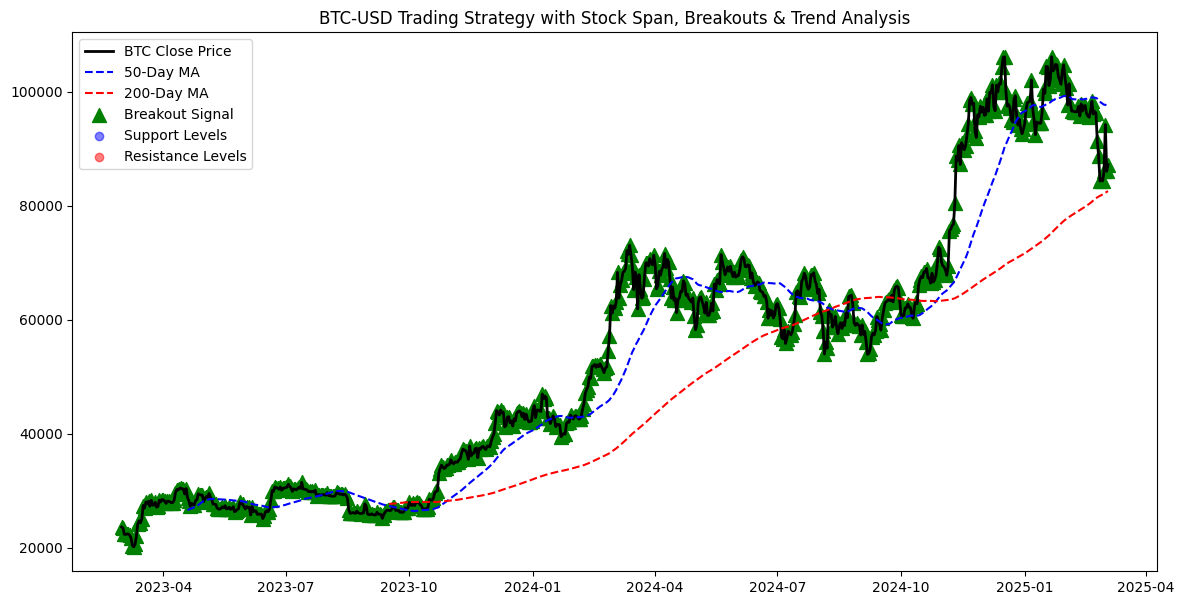

In [ ]:
plt.figure(figsize=(14,7))

# Plot BTC price & moving averages
plt.plot(btc_data.index, btc_data["Close"], label="BTC Close Price", color="black", linewidth=2)
plt.plot(btc_data.index, btc_data["MA50"], label="50-Day MA", linestyle="dashed", color="blue")
plt.plot(btc_data.index, btc_data["MA200"], label="200-Day MA", linestyle="dashed", color="red")

# Plot breakout signals
breakouts = btc_data[btc_data["Stock_Span"] > threshold]
plt.scatter(breakouts.index, breakouts["Close"], color="green", marker="^", s=100, label="Breakout Signal")

# Plot support & resistance
plt.scatter(btc_data.index, btc_data["Support"], color="blue", marker="o", alpha=0.5, label="Support Levels")
plt.scatter(btc_data.index, btc_data["Resistance"], color="red", marker="o", alpha=0.5, label="Resistance Levels")

plt.title("BTC-USD Trading Strategy with Stock Span, Breakouts & Trend Analysis")
plt.legend()
plt.show()
